In [1]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import dataset
df=pd.read_csv("C:\\Users\\ishtiaque\\Desktop\\6b. ML Projects\\Click_Advertisement\\advertising.csv")

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.shape

(1000, 10)

In [5]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [9]:
#Exploratory Data Analysis

Text(0.5, 0, 'Age')

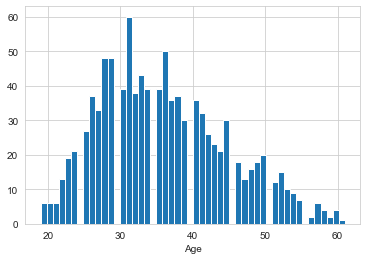

In [14]:
#Create a histogram of the Age
sns.set_style('whitegrid')
df['Age'].hist(bins=50)
plt.xlabel('Age')

In [16]:
pd.crosstab(df['Country'],df['Clicked on Ad'])

Clicked on Ad,0,1
Country,,
Afghanistan,3,5
Albania,3,4
Algeria,3,3
American Samoa,2,3
Andorra,0,2
...,...,...
Wallis and Futuna,3,1
Western Sahara,3,4
Yemen,1,2


In [18]:
pd.crosstab(df['Country'],df['Clicked on Ad']).sort_values(1,ascending=False)

Clicked on Ad,0,1
Country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
...,...,...
Nicaragua,3,0
Niue,3,0
Reunion,2,0


In [20]:
df[df['Clicked on Ad']==1]['Country'].value_counts()

Turkey              7
Australia           7
Ethiopia            7
Liechtenstein       6
South Africa        6
                   ..
Nauru               1
Uzbekistan          1
Pitcairn Islands    1
Haiti               1
Monaco              1
Name: Country, Length: 215, dtype: int64

In [21]:
df[df['Clicked on Ad']==1]['Country'].value_counts().head(10)

Turkey           7
Australia        7
Ethiopia         7
Liechtenstein    6
South Africa     6
Liberia          6
Peru             5
Senegal          5
France           5
Mayotte          5
Name: Country, dtype: int64

In [25]:
pd.crosstab(df['Country'],columns='count').sort_values(['count'],ascending=False)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
...,...
Montserrat,1
Mozambique,1
Romania,1


In [26]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [29]:
type(df['Timestamp'][1])

str

In [30]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])

In [31]:
df['Timestamp']

0     2016-03-27 00:53:11
1     2016-04-04 01:39:02
2     2016-03-13 20:35:42
3     2016-01-10 02:31:19
4     2016-06-03 03:36:18
              ...        
995   2016-02-11 21:49:00
996   2016-04-22 02:07:01
997   2016-02-01 17:24:57
998   2016-03-24 02:35:54
999   2016-06-03 21:43:21
Name: Timestamp, Length: 1000, dtype: datetime64[ns]

In [33]:
df['Month']=df['Timestamp'].dt.month
df['Month']

0      3
1      4
2      3
3      1
4      6
      ..
995    2
996    4
997    2
998    3
999    6
Name: Month, Length: 1000, dtype: int64

In [35]:
df['Day']=df['Timestamp'].dt.day
df['Hour']=df['Timestamp'].dt.hour
df['dayofweek']=df['Timestamp'].dt.dayofweek

In [36]:
df=df.drop(['Timestamp'],axis=1)

In [38]:
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,dayofweek
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6


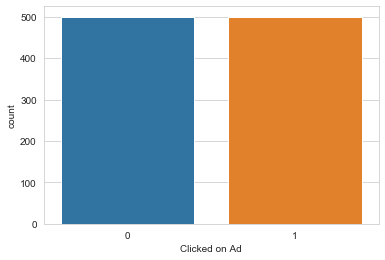

In [41]:
sns.countplot(x='Clicked on Ad',data=df)

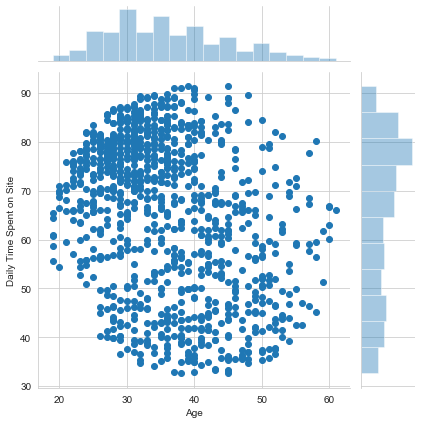

In [42]:
sns.jointplot(x='Age',y='Daily Time Spent on Site', data=df)
#people aged between 30 to 40 are spending more time on site daily

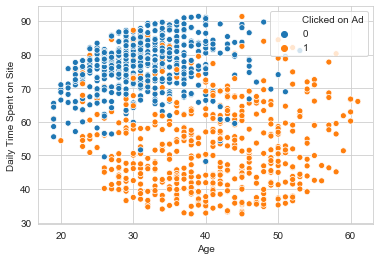

In [43]:
sns.scatterplot(x='Age',y='Daily Time Spent on Site',hue='Clicked on Ad',data=df)
#people aged between 20 to 40 are spending more time on site daily but less chances of them to click on the ads.

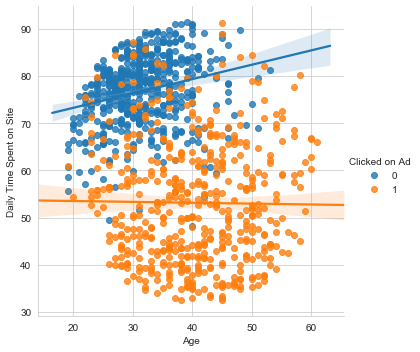

In [44]:
sns.lmplot(x='Age',y='Daily Time Spent on Site',hue='Clicked on Ad',data=df)
#people that are younger and spends more time on site click on the ads less and people who are in between 25-55 and spends less time click on the ads more.

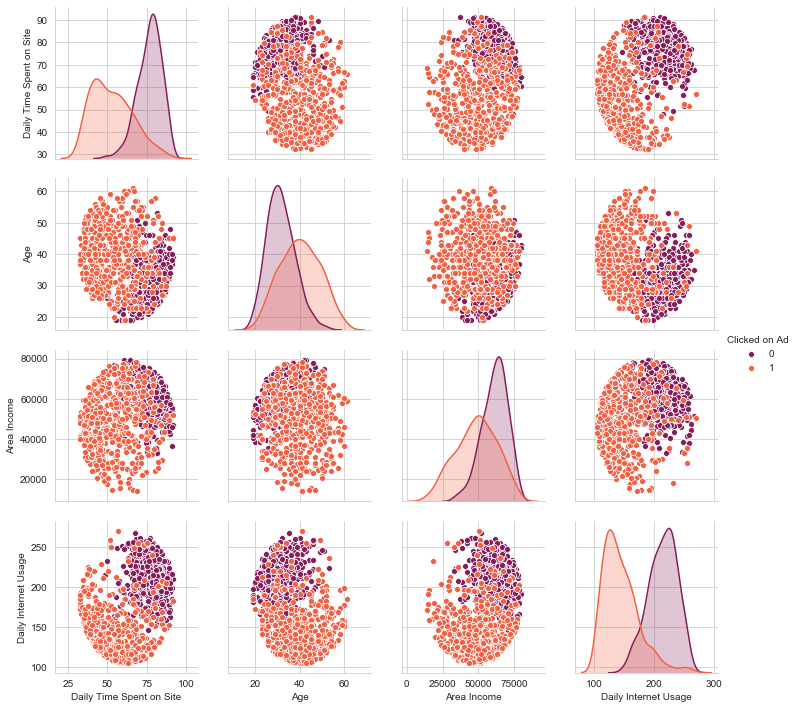

In [45]:
# Creating a pairplot with hue defined by Clicked on Ad column
sns.pairplot(df, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],palette = 'rocket')

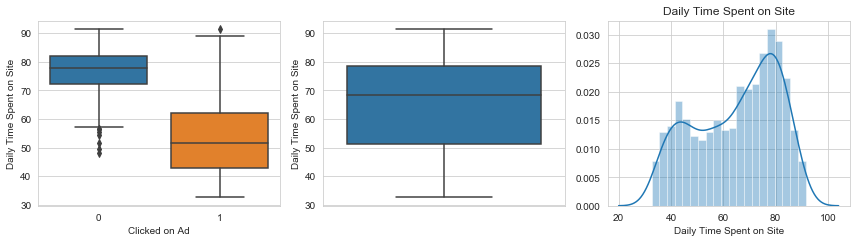

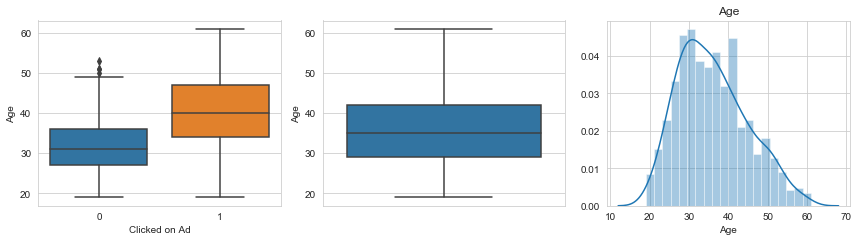

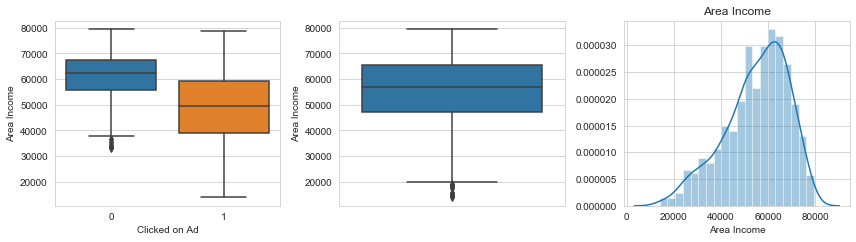

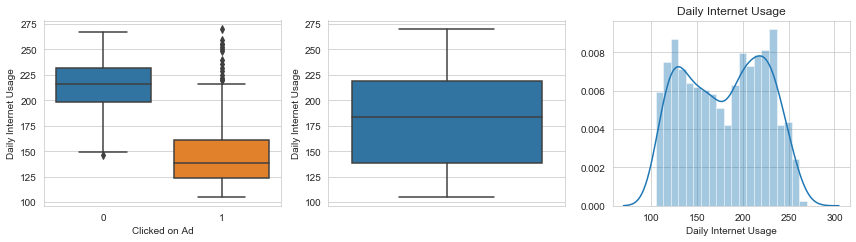

In [47]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    plt.figure(figsize = (12, 6))
    
    plt.subplot(2,3,1)
    sns.boxplot(data= df, y=df[i],x='Clicked on Ad')
    plt.subplot(2,3,2)
    sns.boxplot(data= df, y=df[i])
    plt.subplot(2,3,3)
    sns.distplot(df[i],bins= 20,)       
    plt.tight_layout()
    plt.title(i)    
    plt.show()
    

In [51]:
print('Age of the oldest person who didn\'t clicked on the ad was of:', df['Age'].max(), 'Years')
print('Age of the oldest person who clicked on the ad was of:', df[df['Clicked on Ad']==0]['Age'].max(), 'Years')

Age of the oldest person who didn't clicked on the ad was of: 61 Years
Age of the oldest person who clicked on the ad was of: 53 Years


In [52]:
print('Youngest person was age of:', df['Age'].min(), 'Years')
print('Youngest person who clicked on the ad was age of:', df[df['Clicked on Ad']==0]['Age'].min(), 'Years')

Youngest person was age of: 19 Years
Youngest person who clicked on the ad was age of: 19 Years


In [53]:
print('Average age was of:', df['Age'].mean(), 'Years')

Average age was of: 36.009 Years


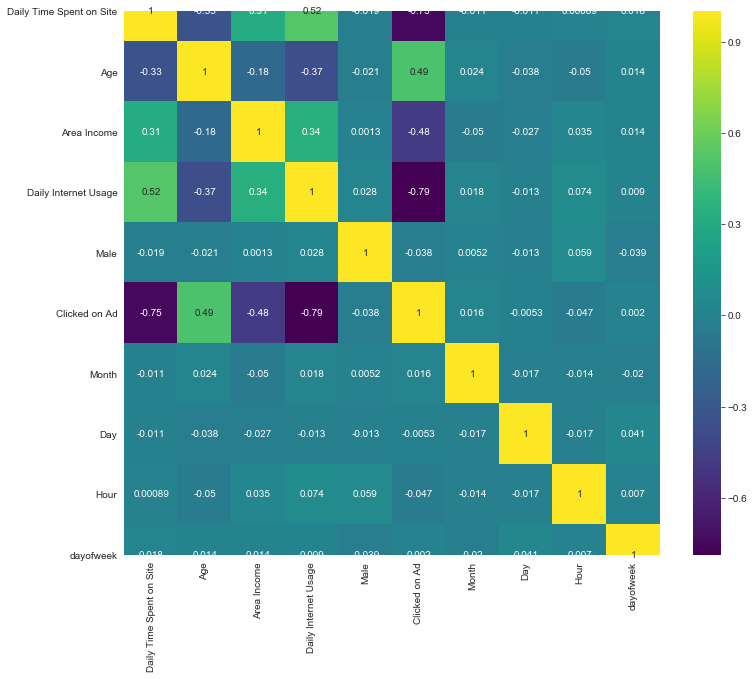

In [56]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

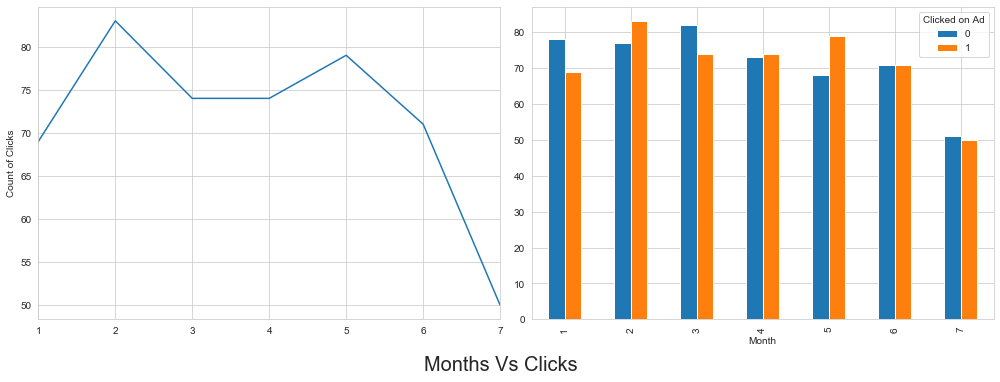

In [58]:
f,ax=plt.subplots(1,2,figsize=(14,5))
df['Month'][df['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(df["Clicked on Ad"], df["Month"]).T.plot(kind = 'bar',ax=ax[1])
#ad_data.groupby(['Month'])['Clicked on Ad'].sum() 
plt.tight_layout()
plt.suptitle('Months Vs Clicks',y=0,size=20)
plt.show()

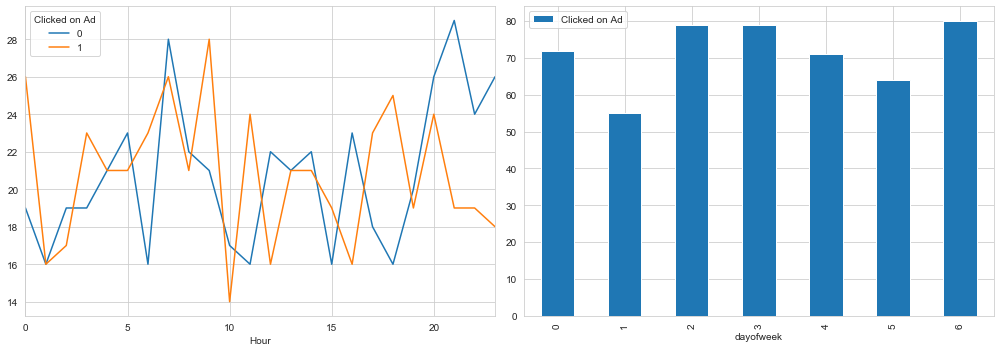

In [60]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(df["Clicked on Ad"], df["Hour"]).T.plot(style = [], ax = ax[0])
pd.pivot_table(df, index = ['dayofweek'], values = ['Clicked on Ad'],aggfunc= np.sum).plot(kind = 'bar', ax=ax[1]) # 0 - Monday
plt.tight_layout()
plt.show()

In [64]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(670, 5) (670,)
(330, 5) (330,)


In [66]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs')

from datetime import datetime
start_time = datetime.now()
model.fit(X_train,y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.062960


In [67]:
start_time = datetime.now()
y_predict=model.predict(X_test)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.003998


In [69]:
#Create a classification report for the model.
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



In [71]:
# Importing a pure confusion matrix from sklearn.metrics family
from sklearn.metrics import confusion_matrix

# Printing the confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[170   1]
 [  5 154]]


In [74]:
model.coef_

array([[-1.50398107e-01,  1.35053274e-01, -9.71534254e-05,
        -5.82231888e-02,  1.37799158e+00]])